In [3]:
%load_ext autoreload
%autoreload 2   #自动重新装入, 2:装入所有 %aimport 不包含的模块

from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Second dimension of the feature is dim2
feature_dim_2 = 11

# Save data to array file first
save_data_to_array(max_len = feature_dim_2)

# Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 50
batch_size = 100
verbose = 1
num_classes = 3

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

Saving vectors of label - 'cat': 100%|██████████| 1733/1733 [00:06<00:00, 256.58it/s]


In [4]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][np.argmax(model.predict(sample_reshaped))]

# Building The Model Then Training it

In [5]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

model = get_model()
model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 3112 samples, validate on 2076 samples
Epoch 1/50
3112/3112 [==============================] - 4s 1ms/step - loss: 1.6354 - acc: 0.4515 - val_loss: 0.7520 - val_acc: 0.7182
Epoch 2/50
3112/3112 [==============================] - 0s 120us/step - loss: 0.7653 - acc: 0.6799 - val_loss: 0.5692 - val_acc: 0.7813
Epoch 3/50
3112/3112 [==============================] - 0s 109us/step - loss: 0.5992 - acc: 0.7654 - val_loss: 0.4021 - val_acc: 0.8531
Epoch 4/50
3112/3112 [==============================] - 0s 119us/step - loss: 0.4842 - acc: 0.8239 - val_loss: 0.3205 - val_acc: 0.8887
Epoch 5/50
3112/3112 [==============================] - 0s 106us/step - loss: 0.3765 - acc: 0.8631 - val_loss: 0.7657 - val_acc: 0.7298
Epoch 6/50
3112/3112 [==============================] - 0s 107us/step - loss: 0.3378 - acc: 0.8740 - val_loss: 0.2720 - val_acc: 0.9118
Epoch 7/50
3112/3112 [==============================] - 0s 111us/step - loss: 0.2613 - acc: 0.9174 - val_loss: 0.2487 - val_acc: 0.9128
Ep

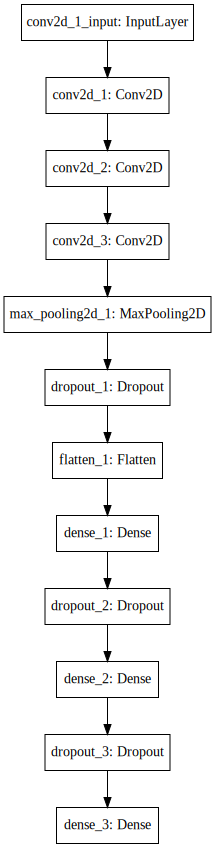

In [10]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

#plot_model(model, show_shapes=True, to_file='model.png')  # 保存图片到本地
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Prediction

In [7]:
print(predict('./data/happy/2b3f509b_nohash_1.wav', model=model))

happy
